# ***Ciencia de datos astronomicos***

Un proyecto y corecto analisis de ciencia de datos nos permite trabajar con cantidades enormes de los mismos segun sea el ambito, en python por ejemplo podemos analizar cantidades enormes de datos desde las decenas de miles hasta las millones o miles de millones para Big Data, uno de los usos recurrentes de esta herramienta es la de analisis astronomico, pues sus interpretaciones permiten interpolar mucha informacion que viene de observatorios y telescopios en orbita como el JW o el hubble.

Haciendo uso de estas herramientas es que se pudo crear la primera imagen de un agujero negro, integrando y analizando cantidades enormes de informacion.

### **Data mining**

Consiste fundamentalmente en obtener los datos fundamentales, generalmente de un banco de datos optimo que pueda proporcionar toda la informacion necesaria, en este caso es mediante [Nasa Exoplantet Achive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS) de donde obtivmos los datos necesarios como el año de descubrimiento, la masa, el metodo por el que fue descubierto y el nombre del exoplaneta

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
stellar_df = pd.read_csv("./Data/PS_2024.03.30_23.30.33.csv")
stellar_df

,pl_name,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_orbper,pl_bmasse,pl_orbeccen,pl_eqt,sy_gaiamag
0,11 Com b,0,2,1,Radial Velocity,2007,NaN,5434.70000,NaN,NaN,4.44038
1,11 Com b,0,2,1,Radial Velocity,2007,326.03000,6165.60000,0.231,NaN,4.44038
2,11 Com b,1,2,1,Radial Velocity,2007,323.21000,4914.89849,0.238,NaN,4.44038
3,11 UMi b,1,1,1,Radial Velocity,2009,516.21997,4684.81420,0.080,NaN,4.56216
4,11 UMi b,0,1,1,Radial Velocity,2009,NaN,3432.40000,NaN,NaN,4.56216
...,...,...,...,...,...,...,...,...,...,...,...
35891,ups And d,0,2,3,Radial Velocity,1999,1319.00000,1255.38000,0.269,NaN,3.98687
35892,ups Leo b,1,1,1,Radial Velocity,2021,385.20000,162.09249,0.320,NaN,4.03040
35893,xi Aql b,0,1,1,Radial Velocity,2007,NaN,642.00000,NaN,NaN,4.42501
35894,xi Aql b,0,1,1,Radial Velocity,2007,136.75000,890.00000,0.000,NaN,4.42501


### **Data Analysis**

Comenzamos ahora con un analisis simple de los datos, usando seaborn podemos ver la densidad de los datos (similar a un histogram) de manera que podemos saber en que periodo fue el auge del descubrimiento de exoplanetas

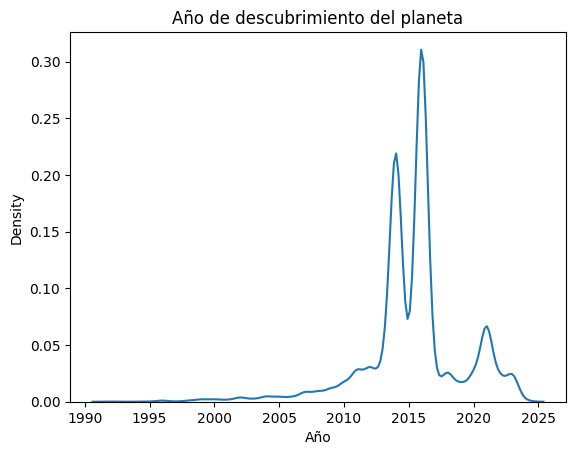

In [105]:
sns.kdeplot(stellar_df["disc_year"])
plt.title("Año de descubrimiento del planeta")
plt.xlabel("Año")
plt.show()

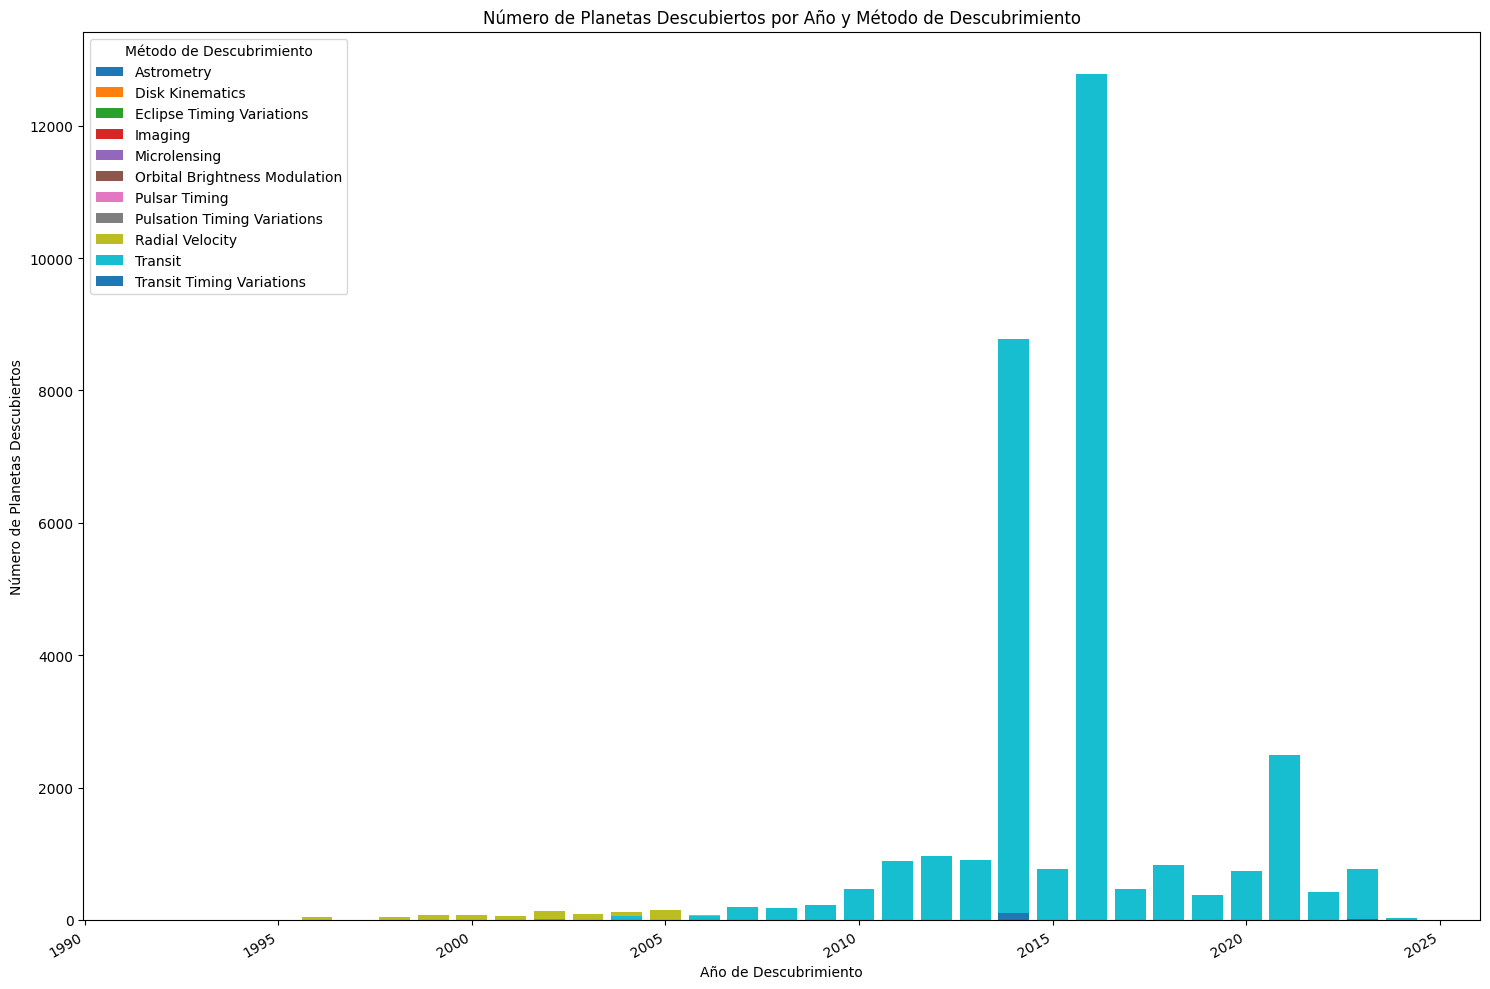

In [120]:
# Agrupar por método de descubrimiento y año, y contar los planetas para cada combinación
grouped = stellar_df.groupby(['discoverymethod', 'disc_year']).size().unstack(fill_value=0)

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(15, 10))

# Iterar sobre cada método de descubrimiento
for method, data in grouped.iterrows():
    # Para cada método, añadir una barra que represente los descubrimientos por año
    ax.bar(data.index, data, label=method)

# Configuración de etiquetas y título
ax.set_xlabel("Año de Descubrimiento")
ax.set_ylabel("Número de Planetas Descubiertos")
ax.set_title("Número de Planetas Descubiertos por Año y Método de Descubrimiento")
ax.legend(title="Método de Descubrimiento", loc="upper left")

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


### **Analisis de la relacion entre la masa y el periodo orbital**

Podemos hacer un analisis y comprender la coorelacion entre la masa de un objeto celeste (exoplaneta) y su periodo orbital

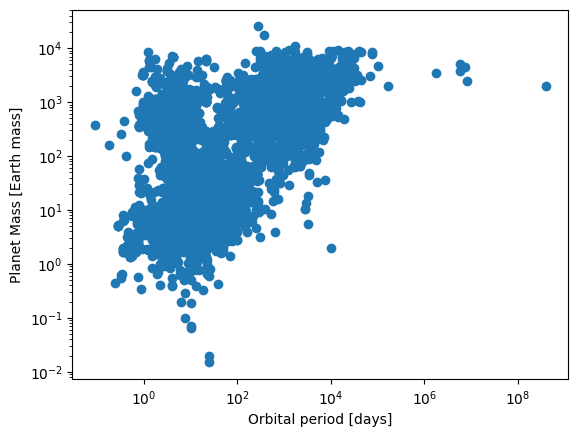

In [114]:
plt.scatter(stellar_df["pl_orbper"], stellar_df["pl_bmasse"])

plt.title("")

plt.ylabel("Planet Mass [Earth mass]")
plt.xlabel("Orbital period [days]")
plt.yscale("log")
plt.xscale("log")

plt.show()

### **Entrenando modelo de prediccion**

Una parte importante de la ciencia de datos es analizar estos de tal manera que podemos predecir de manera certera futuros escenarios, por ejemplo, dado un periodo orbital podemos reducir esfuerzos y tiempos en descubir la masa de dicho planeta en especifico.

In [134]:
import tensorflow as tf

ModuleNotFoundError: No module named 'distutils'